In [1]:
# set up some environmental dependencies
import time, sys, os
import h5py
import numpy as np
from astropy.table import Table
import scipy
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm
from astropy.coordinates import SkyCoord
from astropy.cosmology import WMAP9 as cosmo
from astropy.table import Table
import astropy.cosmology.units as cu
import astropy.units as u
from matplotlib.pyplot import *
import seaborn as sns
import numpy as np, matplotlib.pyplot as plt
from astropy.convolution import convolve, Box1DKernel
from astropy.io import ascii
from matplotlib.font_manager import FontProperties
from matplotlib import gridspec
import matplotlib
import astropy
from astropy.table import unique
import astropy.units as u
from astropy.cosmology import Planck13, z_at_value
from astropy.table import Table
import warnings
warnings.filterwarnings("ignore")

# standard imports for my work
from bpt_utils import *
from read_transients_data import *
from correct_redshift_evolution import *
from generate_bkg_galaxies import *
from helper_functions import *

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams.update(
    {
        'text.usetex': False,
        'font.family': 'stixgeneral',
        'mathtext.fontset': 'stix',
    }
)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['image.origin'] = 'lower'
sns.set_context('talk') 
sns.set(font_scale=1.6)
sns.set_palette('colorblind')
sns.set_style('ticks')
plt.rcParams["font.family"] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Tahoma', 'Verdana', 'Lucida Grande', 'DejaVu Sans']

cmap = matplotlib.cm.get_cmap('magma_r')
colors = ["white", "white", "white"]+[cmap(i/100) for i in range(100)]

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", 
                                                           colors)


In [2]:
frb_df = read_frbs_hosts_data()
frb_df = frb_df[frb_df["z"]<=0.2].reset_index()
frb_df = frb_df.drop(labels=['index'], axis=1)
frb_df.head(2)


,logM,logM_errl,logM_erru,logSFR,logSFR_errl,logSFR_erru,z
0,10.100713,0.004180,0.002193,-0.372874,0.021965,0.022199,0.0112
1,10.399136,0.002144,0.002161,-0.395910,0.027929,0.019919,0.0368


In [3]:
TypeIaSN_df = read_TypeIaSNe_hosts_data()
TypeIaSN_df = TypeIaSN_df[TypeIaSN_df["z"]<=0.2].reset_index()
TypeIaSN_df = TypeIaSN_df.drop(labels=['index'], axis=1)
TypeIaSN_df.head(2)


,logSFR,logSFR_errl,logSFR_erru,logM,logM_errl,logM_erru,z
0,-0.98,0.36,1.02,7.72,0.32,1.00,0.183
1,-0.10,0.07,0.70,9.28,0.34,0.26,0.153


In [4]:
ULX_df = read_ULXsources_hosts_data(True) # ULX sources are already in local universe
ULX_df.head(2)


,logSFR,logSFR_errl,logSFR_erru,logM,logM_errl,logM_erru,z
0,-0.675373,-0.067537,-0.067537,10.713089,0.107131,0.107131,0.003244
1,0.745052,0.074505,0.074505,10.817048,0.108170,0.108170,0.000797


In [5]:
CCSN_df = read_CCSNe_hosts_data()
CCSN_df = CCSN_df[CCSN_df["z"]<=0.2].reset_index()
CCSN_df.head(2)


,index,logM,logM_errl,logM_erru,logSFR,logSFR_errl,logSFR_erru,SN_type,z,filter,rmag,ID
0,0,9.17,0.17,0.12,-0.82,0.71,1.27,SN II,0.064,r,18.47,PTF09axi
1,1,6.51,0.43,0.66,-0.91,1.15,0.92,SN II,0.102,r,24.04,PTF09be


In [6]:
SLSN_df = read_SLSNe_hosts_data()
SLSN_df = SLSN_df[SLSN_df["z"]<=0.2].reset_index()
SLSN_df.head(2)


,index,logM,logM_errl,logM_erru,logSFR,logSFR_errl,logSFR_erru,z
0,0,8.19,0.57,0.36,-0.22,0.55,0.82,0.1866
1,2,7.71,0.38,0.62,-0.43,0.83,0.56,0.1701


In [7]:
sgrb_df = read_sGRB_hosts_data()
sgrb_df = sgrb_df[sgrb_df["z"]<=0.2].reset_index()
sgrb_df.head(2)


,index,logM,logM_errl,logM_erru,logSFR,logSFR_errl,logSFR_erru,z
0,1,8.55,0.01,0.01,-1.69897,0.00000,0.00000,0.161
1,4,7.85,0.03,0.04,-10.00000,0.30103,0.30103,0.125


In [8]:
lgrb_df = read_lGRB_hosts_data()
lgrb_df = lgrb_df[lgrb_df["z"]<=0.2].reset_index()
lgrb_df.head(2)


,index,logM,logM_errl,logM_erru,logSFR,logSFR_errl,logSFR_erru,z
0,0,8.48,0.036827,0.582405,-0.946922,0.036827,0.582405,0.009
1,2,7.71,0.029289,0.074102,-1.065502,0.029289,0.074102,0.169


In [9]:
# Correct stellar mass and SFRs for redshift evolution and 
# generate 100 samples within the error bars
frb_logM_samples_corr, frb_logSFR_samples_corr = generate_z_corr_samples(frb_df)
TypeIaSN_logM_samples_corr, TypeIaSN_logSFR_samples_corr = generate_z_corr_samples(TypeIaSN_df)
ULX_logM_samples_corr, ULX_logSFR_samples_corr = generate_z_corr_samples(ULX_df)
CCSN_logM_samples_corr, CCSN_logSFR_samples_corr = generate_z_corr_samples(CCSN_df)
SLSN_logM_samples_corr, SLSN_logSFR_samples_corr = generate_z_corr_samples(SLSN_df)
sgrb_logM_samples_corr, sgrb_logSFR_samples_corr = generate_z_corr_samples(sgrb_df)
lgrb_logM_samples_corr, lgrb_logSFR_samples_corr = generate_z_corr_samples(lgrb_df)


100%|██████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 44.98it/s]


In [10]:
def get_hist_outs(logM_samples_corr, logSFR_samples_corr):
    bins_logM = np.linspace(5, 12, 100)
    bins_logSFR = np.linspace(-5, 3, 100)
    bins_logsSFR = np.linspace(-5, 3, 100)
    
    outs_logM, outs_logSFR, outs_logsSFR = [], [], []
    for i in tqdm(range(100)):
        out = plt.hist(logM_samples_corr[:, i],
                       bins=bins_logM, alpha=0,
                       histtype="step", color="blue", lw=1,
                       cumulative=True, density=True)
        outs_logM.append(out[0])
        out = plt.hist(logSFR_samples_corr[:, i],
                       bins=bins_logSFR, alpha=0,
                       histtype="step", color="blue", lw=1,
                       cumulative=True, density=True)
        outs_logSFR.append(out[0])
        out = plt.hist(np.array(logSFR_samples_corr[:, i])-np.array(logM_samples_corr[:, i])+9,
                       bins=bins_logsSFR, alpha=0,
                       histtype="step", color="blue", lw=1,
                       cumulative=True, density=True)
        outs_logsSFR.append(out[0])
    plt.close()
    return outs_logM, outs_logSFR, outs_logsSFR

# Generate empirical distributions of stellar mass, SFRs and sSFRs for all transients
TypeIaSN_outs_logM, TypeIaSN_outs_logSFR, TypeIaSN_outs_logsSFR = get_hist_outs(TypeIaSN_logM_samples_corr, TypeIaSN_logSFR_samples_corr)
CCSN_outs_logM, CCSN_outs_logSFR, CCSN_outs_logsSFR = get_hist_outs(CCSN_logM_samples_corr, CCSN_logSFR_samples_corr)
SLSN_outs_logM, SLSN_outs_logSFR, SLSN_outs_logsSFR = get_hist_outs(SLSN_logM_samples_corr, SLSN_logSFR_samples_corr)
ULX_outs_logM, ULX_outs_logSFR, ULX_outs_logsSFR = get_hist_outs(ULX_logM_samples_corr, ULX_logSFR_samples_corr)
sgrb_outs_logM, sgrb_outs_logSFR, sgrb_outs_logsSFR = get_hist_outs(sgrb_logM_samples_corr, sgrb_logSFR_samples_corr)
lgrb_outs_logM, lgrb_outs_logSFR, lgrb_outs_logsSFR = get_hist_outs(lgrb_logM_samples_corr, lgrb_logSFR_samples_corr)
frb_outs_logM, frb_outs_logSFR, frb_outs_logsSFR = get_hist_outs(frb_logM_samples_corr, frb_logSFR_samples_corr)


100%|████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 55.62it/s]


In [11]:
from scipy import stats
def compute_pvalues(frbs_vals, transient_vals):
    pvalues = []
    for i in range(100):
        pvalues.append(stats.ks_2samp(frbs_vals[:, i], transient_vals[:, i]).pvalue)
    return pvalues

# compute sSFRs
frb_logsSFR_samples_corr = np.array(frb_logSFR_samples_corr)-np.array(frb_logM_samples_corr)+9
TypeIaSN_logsSFR_samples_corr = np.array(TypeIaSN_logSFR_samples_corr)-np.array(TypeIaSN_logM_samples_corr)+9
CCSN_logsSFR_samples_corr = np.array(CCSN_logSFR_samples_corr)-np.array(CCSN_logM_samples_corr)+9
SLSN_logsSFR_samples_corr = np.array(SLSN_logSFR_samples_corr)-np.array(SLSN_logM_samples_corr)+9
ULX_logsSFR_samples_corr = np.array(ULX_logSFR_samples_corr)-np.array(ULX_logM_samples_corr)+9
sgrb_logsSFR_samples_corr = np.array(sgrb_logSFR_samples_corr)-np.array(sgrb_logM_samples_corr)+9
lgrb_logsSFR_samples_corr = np.array(lgrb_logSFR_samples_corr)-np.array(lgrb_logM_samples_corr)+9

# compute p-values for similarity between FRBs and other transients
TypeIaSN_pvalues_logM, TypeIaSN_pvalues_logSFR, TypeIaSN_pvalues_logsSFR = compute_pvalues(frb_logM_samples_corr, TypeIaSN_logM_samples_corr), compute_pvalues(frb_logSFR_samples_corr, TypeIaSN_logSFR_samples_corr), compute_pvalues(frb_logsSFR_samples_corr, TypeIaSN_logsSFR_samples_corr)
CCSN_pvalues_logM, CCSN_pvalues_logSFR, CCSN_pvalues_logsSFR = compute_pvalues(frb_logM_samples_corr, CCSN_logM_samples_corr), compute_pvalues(frb_logSFR_samples_corr, CCSN_logSFR_samples_corr), compute_pvalues(frb_logsSFR_samples_corr, CCSN_logsSFR_samples_corr)
SLSN_pvalues_logM, SLSN_pvalues_logSFR, SLSN_pvalues_logsSFR = compute_pvalues(frb_logM_samples_corr, SLSN_logM_samples_corr), compute_pvalues(frb_logSFR_samples_corr, SLSN_logSFR_samples_corr), compute_pvalues(frb_logsSFR_samples_corr, SLSN_logsSFR_samples_corr)
ULX_pvalues_logM, ULX_pvalues_logSFR, ULX_pvalues_logsSFR = compute_pvalues(frb_logM_samples_corr, ULX_logM_samples_corr), compute_pvalues(frb_logSFR_samples_corr, ULX_logSFR_samples_corr), compute_pvalues(frb_logsSFR_samples_corr, ULX_logsSFR_samples_corr)
sgrb_pvalues_logM, sgrb_pvalues_logSFR, sgrb_pvalues_logsSFR = compute_pvalues(frb_logM_samples_corr, sgrb_logM_samples_corr), compute_pvalues(frb_logSFR_samples_corr, sgrb_logSFR_samples_corr), compute_pvalues(frb_logsSFR_samples_corr, sgrb_logsSFR_samples_corr)
lgrb_pvalues_logM, lgrb_pvalues_logSFR, lgrb_pvalues_logsSFR = compute_pvalues(frb_logM_samples_corr, lgrb_logM_samples_corr), compute_pvalues(frb_logSFR_samples_corr, lgrb_logSFR_samples_corr), compute_pvalues(frb_logsSFR_samples_corr, lgrb_logsSFR_samples_corr)

print("TypeIaSN", np.percentile(TypeIaSN_pvalues_logM, 50), np.percentile(TypeIaSN_pvalues_logSFR, 50), np.percentile(TypeIaSN_pvalues_logsSFR, 50))
print("CCSN", np.percentile(CCSN_pvalues_logM, 50), np.percentile(CCSN_pvalues_logSFR, 50), np.percentile(CCSN_pvalues_logsSFR, 50))
print("SLSN", np.percentile(SLSN_pvalues_logM, 50), np.percentile(SLSN_pvalues_logSFR, 50), np.percentile(SLSN_pvalues_logsSFR, 50))
print("ULX", np.percentile(ULX_pvalues_logM, 50), np.percentile(ULX_pvalues_logSFR, 50), np.percentile(ULX_pvalues_logsSFR, 50))
print("sGRB", np.percentile(sgrb_pvalues_logM, 50), np.percentile(sgrb_pvalues_logSFR, 50), np.percentile(sgrb_pvalues_logsSFR, 50))
print("lGRB", np.percentile(lgrb_pvalues_logM, 50), np.percentile(lgrb_pvalues_logSFR, 50), np.percentile(lgrb_pvalues_logsSFR, 50))


TypeIaSN 0.20042979594409427 0.31720254977944573 0.06675893047026485
CCSN 0.04205678577236512 0.5872489006387644 0.2549666184639257
SLSN 3.558509511514474e-09 0.04728106904610886 9.216294758986528e-07
ULX 0.0002492368866692428 0.04569463088416196 0.22238565783348596
sGRB 0.034649730301904214 0.08517279821627648 0.20282760717543324
lGRB 0.00012899434720782112 0.15964243153148702 0.007024332569624439


In [12]:
# Read Host-Normalized Offsets Data
typeIa_offset_, typeIa_err_ = read_TypeIaSNe_normalized_offsets() # already local universe
ccsn_offset_, ccsn_err_ = read_CCSNe_normalized_offsets() # already local universe
sgrb_offset_, sgrb_err_ = read_sGRB_normalized_offsets(zcut=0.2)
mw_sattelites_offsets_norm = read_MW_sattelites_normalized_offsets()
mw_gc_offsets_norm = read_MW_GCs_normalized_offsets()


In [13]:
# Read in FRBs Host-Normalized Offsets Data
frb_data1 = pd.read_csv("frbs_data/mannings_et_al.txt", sep="\t")
frb_data2 = pd.read_csv("frbs_data/mannings_et_al_redshifts.txt", sep="\t")
frb_data = pd.concat([frb_data1, frb_data2], axis=1, join="inner")
frb_data = frb_data[frb_data["z"]<=0.2].reset_index()

frb_offset_1 = [float(frb_data['delta R/r_e'][i].split(" +or- ")[0]) for i in range(len(frb_data))]
frb_err_1 = [float(frb_data['delta R/r_e'][i].split(" +or- ")[1]) for i in range(len(frb_data))]
woodland_offset_ = [4.32, 0.74, 1.20]
woodland_err_ = [0.34, 0.12, 0.42]
frb_offset_ = frb_offset_1 + woodland_offset_
frb_err_ = frb_err_1 + woodland_err_


Text(0.01, 1.05, 'b')

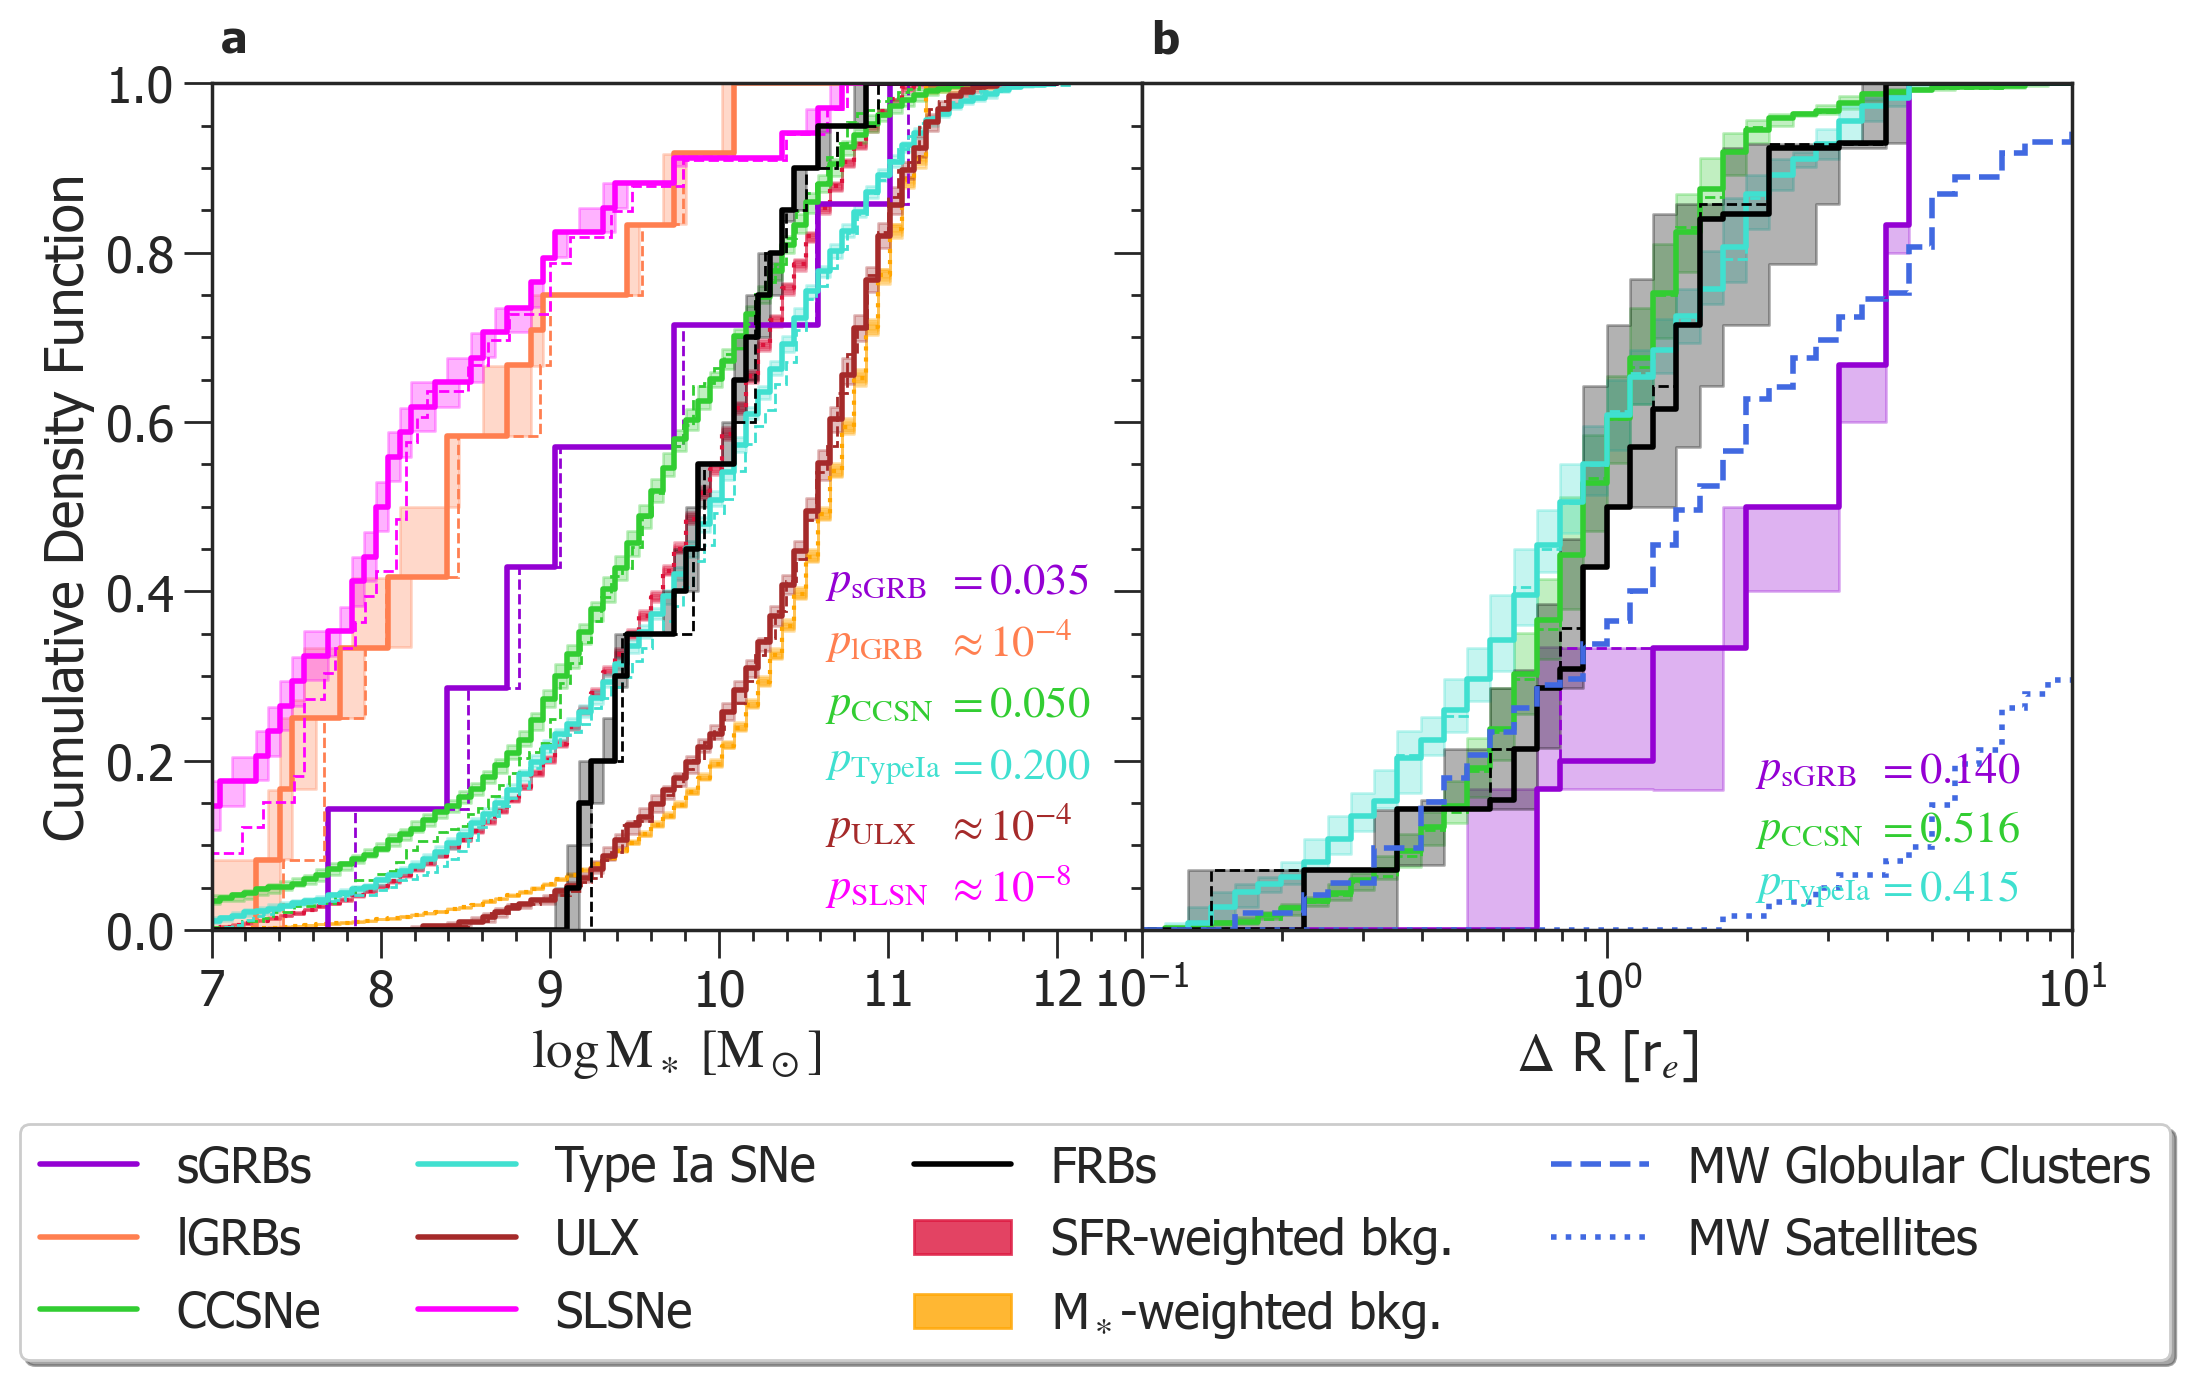

In [14]:
fontsize = 16
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5.5))

axes[0].tick_params(axis='x')
axes[0].tick_params(axis='y')

df = pd.read_csv("galaxies_data/local_univ_bkg.csv")
axes[0].plot(df["bins_logM_"], df["quant50_m"], color="orange", ls="dotted")
axes[0].fill_between(df["bins_logM_"], df["quant50_m"]+np.array(df["quant16_m"]), df["quant50_m"]+np.array(df["quant84_m"]), 
                 color="orange", alpha=0.3)
axes[0].fill_between(df["bins_logM_"], np.array(df["quant50_m"])+np.array(df["quant05_m"]), np.array(df["quant50_m"])+np.array(df["quant95_m"]), 
                 color="orange", alpha=0.3)
axes[0].fill_between(df["bins_logM_"], np.array(df["quant50_m"])+np.array(df["quant01_m"]), np.array(df["quant50_m"])+np.array(df["quant99_m"]), 
                 color="orange", alpha=0.3)

axes[0].plot(df["bins_logM_"], df["quant50_s"], color="crimson", ls="dotted")
axes[0].fill_between(df["bins_logM_"], np.array(df["quant50_s"])+np.array(df["quant16_s"]), np.array(df["quant50_s"])+np.array(df["quant84_s"]), 
                 color="crimson", alpha=0.3)
axes[0].fill_between(df["bins_logM_"], np.array(df["quant50_s"])+np.array(df["quant05_s"]), np.array(df["quant50_s"])+np.array(df["quant95_s"]), 
                 color="crimson", alpha=0.3)
axes[0].fill_between(df["bins_logM_"], np.array(df["quant50_s"])+np.array(df["quant01_s"]), np.array(df["quant50_s"])+np.array(df["quant99_s"]), 
                 color="crimson", alpha=0.3)

bins_logM = np.linspace(5, 12, 100)
bins_logM_ = []
for i in range(len(bins_logM)-1):
    bins_logM_.append(bins_logM[i]), bins_logM_.append(bins_logM[i+1])

quant16, quant50, quant84 = return_quants(sgrb_outs_logM, 1)
axes[0].fill_between(bins_logM_, np.array(quant50)+np.array(quant16), np.array(quant50)+np.array(quant84), 
                     color="darkviolet", alpha=0.3)
_ = axes[0].plot(bins_logM_, np.array(quant50), label="sGRBs",
                 alpha=1, color="darkviolet", lw=2)
_ = axes[0].hist(sgrb_df.logM, 
                 bins=np.linspace(7, 13, 100), alpha=1,
                 histtype="step", color="darkviolet", lw=1, ls="dashed", 
                 cumulative=True, density=True)

quant16, quant50, quant84 = return_quants(lgrb_outs_logM, 1)
axes[0].fill_between(bins_logM_, np.array(quant50)+np.array(quant16), np.array(quant50)+np.array(quant84), 
                     color="coral", alpha=0.3)
_ = axes[0].plot(bins_logM_, np.array(quant50), label="lGRBs",
                 alpha=1, color="coral", lw=2)
_ = axes[0].hist(lgrb_df.logM, 
                 bins=np.linspace(7, 13, 100), alpha=1,
                 histtype="step", color="coral", lw=1, ls="dashed",
                 cumulative=True, density=True)

quant16, quant50, quant84 = return_quants(CCSN_outs_logM, 1)
axes[0].fill_between(bins_logM_, np.array(quant50)+np.array(quant16), np.array(quant50)+np.array(quant84), 
                     color="limegreen", alpha=0.3)
_ = axes[0].plot(bins_logM_, np.array(quant50), label="CCSNe", 
                 alpha=1, color="limegreen", lw=2)
_ = axes[0].hist(CCSN_df.logM, 
                 bins=np.linspace(7, 13, 100), alpha=1,
                 histtype="step", color="limegreen", lw=1, ls="dashed",
                 cumulative=True, density=True)

quant16, quant50, quant84 = return_quants(TypeIaSN_outs_logM, 1)
axes[0].fill_between(bins_logM_, np.array(quant50)+np.array(quant16), np.array(quant50)+np.array(quant84), 
                     color="turquoise", alpha=0.3)
_ = axes[0].plot(bins_logM_, np.array(quant50), label="Type Ia SNe", 
                 alpha=1, color="turquoise", lw=2)
_ = axes[0].hist(TypeIaSN_df.logM, 
                 bins=np.linspace(7, 13, 100), alpha=1,
                 histtype="step", color="turquoise", lw=1, ls="dashed",
                 cumulative=True, density=True)

quant16, quant50, quant84 = return_quants(ULX_outs_logM, 1)
axes[0].fill_between(bins_logM_, np.array(quant50)+np.array(quant16), np.array(quant50)+np.array(quant84), 
                     color="brown", alpha=0.3)
_ = axes[0].plot(bins_logM_, np.array(quant50), label="ULX", 
                 alpha=1, color="brown", lw=2)
_ = axes[0].hist(ULX_df.logM, 
                 bins=np.linspace(7, 13, 100), alpha=1,
                 histtype="step", color="brown", lw=1, ls="dashed",
                 cumulative=True, density=True)

quant16, quant50, quant84 = return_quants(SLSN_outs_logM, 1)
axes[0].fill_between(bins_logM_, np.array(quant50)+np.array(quant16), np.array(quant50)+np.array(quant84), 
                     color="magenta", alpha=0.3)
_ = axes[0].plot(bins_logM_, np.array(quant50), label="SLSNe",
                 alpha=1, color="magenta", lw=2)
_ = axes[0].hist(SLSN_df.logM, 
                 bins=np.linspace(7, 13, 100), alpha=1,
                 histtype="step", color="magenta", lw=1, ls="dashed",
                 cumulative=True, density=True)

quant16, quant50, quant84 = return_quants(frb_outs_logM, 1)
axes[0].fill_between(bins_logM_, np.array(quant50)+np.array(quant16), np.array(quant50)+np.array(quant84), 
                     color="black", alpha=0.3)
_ = axes[0].plot(bins_logM_, np.array(quant50), label="FRBs",
                 alpha=1, color="black", lw=2)
_ = axes[0].hist(frb_df.logM, 
                 bins=np.linspace(7, 13, 100), alpha=1,
                 histtype="step", color="black", lw=1, ls="dashed",
                 cumulative=True, density=True)

axes[0].set_xlim(7, 12)
axes[0].set_ylim(0, 1)
axes[0].set_xlabel(r"$\log{{\mathrm{M}}_\ast}~[{\mathrm{M}}_\odot]$")
axes[0].set_ylabel("Cumulative Density Function")


axes[0].text(0.69-0.03, 0.35+0.0625, r"$p_{\mathrm{sGRB}}$",
             color="darkviolet", ha='left', va='center', 
             transform=axes[0].transAxes, fontsize=fontsize)
axes[0].text(0.82-0.03, 0.35+0.0625, r"$= 0.035$",
             color="darkviolet", ha='left', va='center', 
             transform=axes[0].transAxes, fontsize=fontsize)

axes[0].text(0.69-0.03, 0.29+0.05, r"$p_{\mathrm{lGRB}}$",
             color="coral", ha='left', va='center', 
             transform=axes[0].transAxes, fontsize=fontsize)
axes[0].text(0.82-0.03, 0.29+0.05, r"$\approx 10^{-4}$",
             color="coral", ha='left', va='center', 
             transform=axes[0].transAxes, fontsize=fontsize)

axes[0].text(0.69-0.03, 0.23+0.0375, r"$p_{\mathrm{CCSN}}$",
             color="limegreen", ha='left', va='center', 
             transform=axes[0].transAxes, fontsize=fontsize)
axes[0].text(0.82-0.03, 0.23+0.0375, r"$= 0.050$",
             color="limegreen", ha='left', va='center', 
             transform=axes[0].transAxes, fontsize=fontsize)

axes[0].text(0.69-0.03, 0.17+0.025, r"$p_{\mathrm{TypeIa}}$",
             color="turquoise", ha='left', va='center', 
             transform=axes[0].transAxes, fontsize=fontsize)
axes[0].text(0.82-0.03, 0.17+0.025, r"$= 0.200$",
             color="turquoise", ha='left', va='center', 
             transform=axes[0].transAxes, fontsize=fontsize)

axes[0].text(0.69-0.03, 0.11+0.0125, r"$p_{\mathrm{ULX}}$",
             color="brown", ha='left', va='center', 
             transform=axes[0].transAxes, fontsize=fontsize)
axes[0].text(0.82-0.03, 0.11+0.0125, r"$\approx 10^{-4}$",
             color="brown", ha='left', va='center', 
             transform=axes[0].transAxes, fontsize=fontsize)

axes[0].text(0.69-0.03, 0.05, r"$p_{\mathrm{SLSN}}$",
             color="magenta", ha='left', va='center', 
             transform=axes[0].transAxes, fontsize=fontsize)
axes[0].text(0.82-0.03, 0.05, r"$\approx 10^{-8}$",
             color="magenta", ha='left', va='center', 
             transform=axes[0].transAxes, fontsize=fontsize)

axes[0].set_yticks(np.arange(0, 1, 0.2))                                                                                                                                                                                                                                                                                                                                                        
axes[0].yaxis.set_major_locator(MultipleLocator(0.2))                                                                                                                                                                                                                     
axes[0].yaxis.set_minor_locator(MultipleLocator(0.05)) 
axes[0].set_xticks(np.arange(7, 12, 1))                                                                                                                                                                                                                                                                                                                                                        
axes[0].xaxis.set_major_locator(MultipleLocator(1))                                                                                                                                                                                                                     
axes[0].xaxis.set_minor_locator(MultipleLocator(0.2)) 
axes[0].tick_params(direction='out', length=6, width=1, top=False, right=False)
axes[0].tick_params(which='both', width=1)
axes[0].tick_params(which='major', length=10)
axes[0].tick_params(which='minor', length=4)
axes[0].set_ylim(0, 1)
axes[0].set_xlim(7, 12.5)


fig.subplots_adjust(wspace=0)


half_size = 1000 // 2
deciding_toss = [1] * half_size + [0] * (1000 - half_size)
import random
random.shuffle(deciding_toss)

bins = 10**np.arange(-1, 2, 0.05)
bins_ = []
for i in range(len(bins)-1):
    bins_.append(bins[i])
    bins_.append(bins[i+1])

frbs_outs = []
sgrb_outs = []
ccsn_outs = []
typeIa_outs = []

pvalues_sgrb = []
pvalues_ccsn = []
pvalues_typeIa = []

large_host_sample = read_dsa_data()
large_host_sample = large_host_sample[large_host_sample["sed_done?"]=="Y"]
large_host_sample_gold = large_host_sample[large_host_sample["sample"]=="Gold"].reset_index() 
large_host_sample_gold = large_host_sample_gold[large_host_sample_gold["redshift"]<=0.2].reset_index()

for k in (range(1000)): 
    samples_frb = []
    samples_sgrb = []
    samples_ccsn = []
    samples_typeIa = []
    
    for i in range(len(large_host_sample_gold)):
        samples_frb = samples_frb + [generate_equidistant_offsets_ellipse(large_host_sample_gold["ra_proj_gal_dist (kpc)"][i], 
                                                                          large_host_sample_gold["dec_proj_gal_dist (kpc)"][i], 
                                                                          large_host_sample_gold["ra_proj_gal_dist_err (kpc)"][i], 
                                                                          large_host_sample_gold["dec_proj_gal_dist_err (kpc)"][i], 
                                                                          deciding_toss[k])/large_host_sample_gold["half_light_radius (kpc)"][i]]

    for i in range(len(frb_offset_)):
        samples_frb = samples_frb + generate_equidistant_offsets_circle(frb_offset_[i],
                                                                        frb_err_[i],
                                                                        deciding_toss[k])
        
    for i in range(len(sgrb_offset_)):
        samples_sgrb = samples_sgrb + generate_equidistant_offsets_circle(sgrb_offset_[i],
                                                                          sgrb_err_[i],
                                                                          deciding_toss[k])

    for i in range(len(ccsn_offset_)):
        samples_ccsn = samples_ccsn + generate_equidistant_offsets_circle(ccsn_offset_[i],
                                                                          ccsn_err_[i],
                                                                          deciding_toss[k])
    
    for i in range(len(typeIa_offset_)):
        samples_typeIa = samples_typeIa + generate_equidistant_offsets_circle(typeIa_offset_[i],
                                                                              typeIa_err_[i],
                                                                              deciding_toss[k])

    pvalues_sgrb.append(stats.ks_2samp(samples_sgrb, samples_frb).pvalue)
    pvalues_ccsn.append(stats.ks_2samp(samples_ccsn, samples_frb).pvalue)
    pvalues_typeIa.append(stats.ks_2samp(samples_typeIa, samples_frb).pvalue)
        
    frbs_out = axes[1].hist(samples_frb, bins=bins, alpha=0,
                            histtype="step", color="royalblue", lw=1,
                            cumulative=True, density=True)
    frbs_outs.append(frbs_out[0])
        
    sgrb_out = axes[1].hist(samples_sgrb, bins=bins, alpha=0,
                            histtype="step", color="darkviolet", lw=1,
                            cumulative=True, density=True)
    sgrb_outs.append(sgrb_out[0])

    ccsn_out = axes[1].hist(samples_ccsn, bins=bins, alpha=0,
                            histtype="step", color="orange", lw=1,
                            cumulative=True, density=True)
    ccsn_outs.append(ccsn_out[0])

    typeIa_out = axes[1].hist(samples_typeIa, bins=bins, alpha=0,
                              histtype="step", color="turquoise", lw=1,
                              cumulative=True, density=True)
    typeIa_outs.append(typeIa_out[0])


axes[1].set_yticks(np.arange(0, 1, 0.2))                                                                                                                                                                                                                                                                                                                                                          
axes[1].yaxis.set_major_locator(MultipleLocator(0.2))                                                                                                                                                                                                                     
axes[1].yaxis.set_minor_locator(MultipleLocator(0.05)) 
axes[1].tick_params(direction='out', length=6, width=1, top=False, right=False)
axes[1].tick_params(which='both', width=1)
axes[1].tick_params(which='major', length=10)
axes[1].tick_params(which='minor', length=4)
axes[1].set_ylim(0, 1)
axes[1].set_xlim(bins[0], 10)
axes[1].set_xscale("log")


quant16, quant50, quant84 = return_quants(sgrb_outs, 1)
axes[1].fill_between(bins_, 
                     np.array(quant50)+np.array(quant16), 
                     np.array(quant50)+np.array(quant84), 
                     color="darkviolet", alpha=0.3)
_ = axes[1].plot(bins_, np.array(quant50),
                 alpha=1, color="darkviolet", lw=2)
_ = axes[1].hist(sgrb_offset_, 
                 bins=bins, alpha=1,
                 histtype="step", color="darkviolet", lw=1, ls="dashed",
                 label = "sGRBs",
                 cumulative=True, density=True)


quant16, quant50, quant84 = return_quants(ccsn_outs, 1)
axes[1].fill_between(bins_, 
                     np.array(quant50)+np.array(quant16), 
                     np.array(quant50)+np.array(quant84), 
                     color="limegreen", alpha=0.3)
_ = axes[1].plot(bins_, np.array(quant50), label = "CCSNe",
                 alpha=1, color="limegreen", lw=2)
_ = axes[1].hist(ccsn_offset_, 
                 bins=bins, alpha=1,
                 histtype="step", color="limegreen", lw=1, ls="dashed",
                 cumulative=True, density=True)


quant16, quant50, quant84 = return_quants(typeIa_outs, 1)
axes[1].fill_between(bins_, 
                     np.array(quant50)+np.array(quant16), 
                     np.array(quant50)+np.array(quant84), 
                     color="turquoise", alpha=0.3)
_ = axes[1].plot(bins_, np.array(quant50), label = "Type Ia SNe",
                 alpha=1, color="turquoise", lw=2)
_ = axes[1].hist(typeIa_offset_, 
                 bins=bins, alpha=1,
                 histtype="step", color="turquoise", lw=1, ls="dashed",
                 cumulative=True, density=True)


quant16, quant50, quant84 = return_quants(frbs_outs, 1)
axes[1].fill_between(bins_, 
                     np.array(quant50)+np.array(quant16), 
                     np.array(quant50)+np.array(quant84), 
                     color="black", alpha=0.3)
_ = axes[1].plot(bins_, np.array(quant50), label = "FRBs",
                 alpha=1, color="black", lw=2)

large_host_sample_gold["proj_gal_dist (kpc)"] = np.sqrt(np.array(large_host_sample_gold["ra_proj_gal_dist (kpc)"])**2 + np.array(large_host_sample_gold["dec_proj_gal_dist (kpc)"])**2)
_ = axes[1].hist(frb_offset_+list(large_host_sample_gold["proj_gal_dist (kpc)"]/large_host_sample_gold["half_light_radius (kpc)"]),
                 bins=bins, alpha=1,
                 histtype="step", color="black", lw=1, ls="dashed",
                 cumulative=True, density=True)

axes[1].hist(mw_gc_offsets_norm,
             bins=bins, alpha=1,
             histtype="step", color="royalblue", lw=2,
             label = "MW Globular Clusters", ls = "--",
             cumulative=True, density=True)
axes[1].hist(mw_sattelites_offsets_norm,
             bins=bins, alpha=1,
             histtype="step", color="royalblue", lw=2,
             label = "MW Sattelites", ls = "dotted",
             cumulative=True, density=True)

axes[1].text(0.66, 0.19, r"$p_{\mathrm{sGRB}}$",
             color="darkviolet", ha='left', va='center', 
             transform=axes[1].transAxes, fontsize=16)
axes[1].text(0.79, 0.19, r"$= 0.140$",
             color="darkviolet", ha='left', va='center', 
             transform=axes[1].transAxes, fontsize=16)
axes[1].text(0.66, 0.12, r"$p_{\mathrm{CCSN}}$",
             color="limegreen", ha='left', va='center', 
             transform=axes[1].transAxes, fontsize=16)
axes[1].text(0.79, 0.12, r"$= 0.516$",
             color="limegreen", ha='left', va='center', 
             transform=axes[1].transAxes, fontsize=16)
axes[1].text(0.66, 0.05, r"$p_{\mathrm{TypeIa}}$",
             color="turquoise", ha='left', va='center', 
             transform=axes[1].transAxes, fontsize=16)
axes[1].text(0.79, 0.05, r"$= 0.415$",
             color="turquoise", ha='left', va='center', 
             transform=axes[1].transAxes, fontsize=16)

axes[0].fill_between([], [], [], label="SFR-weighted bkg.",
                 color="crimson", alpha=0.8)
axes[0].fill_between([], [], [], label=r"M$_\ast$-weighted bkg.",
                 color="orange", alpha=0.8)

axes[0].plot([], [], alpha=1, color="royalblue", lw=2,
             label = "MW Globular Clusters", ls = "--")
axes[0].plot([], [], alpha=1, color="royalblue", lw=2,
             label = "MW Satellites", ls = "dotted")

axes[0].legend(loc='upper center', bbox_to_anchor=(0.95, -0.2),
               ncol=4, fancybox=True, shadow=True)

axes[1].set_xlabel(r"$\Delta$ R [r$_e$]")

axes[0].text(0.01, 1.05, "a", ha='left', va='center', weight='bold', 
         transform=axes[0].transAxes, fontsize=16)
axes[1].text(0.01, 1.05, "b", ha='left', va='center', weight='bold', 
         transform=axes[1].transAxes, fontsize=16)

# os.chdir("/Users/krittisharma/Desktop/research/frb_hosts/results_v2/")
# plt.savefig('figures/compare_with_other_transients_in_local_univ_bin_new.png', dpi=400, bbox_inches='tight')


In [15]:
print(print_sigmas(pvalues_sgrb, 1))
print(print_sigmas(pvalues_ccsn, 1))
print(print_sigmas(pvalues_typeIa, 1))


(0.14, -0.074, 0.21)
(0.491, -0.335, 0.436)
(0.415, -0.161, 0.297)
